# Repairing structures along an Ensemble

By repairing a structure:

- All incomplete sidechains will be completed.
- Residues with high energy will be self-mutated to try rotamers that minimize the energy.

To repair en ensemble of structures is as simple as call the *repair()* method. The *inPlace* parameter determines if the original ensemble will be overwritten with the repaired structures or a new ensemble will be created. By passing a list of residues in FoldX format to the *fixResidues* parameter these residues will not be taken into account for repair.

In [1]:
from pyfoldx.structure import UniprotEnsemble

In [2]:
#Some other imports, to work with the data and to plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# We want to print full tables
pd.set_option("display.max_rows", 1000, "display.max_columns", 1000)

We will create a *UniprotEnsemble* object with high quality structures of the HRAS gene.

In [3]:
working_path = "/home/lradusky/Downloads/P01112/ensemble.pdb"
t = UniprotEnsemble("P01112", working_path, just_xray=True, max_resolution=1.3)

Master Structure is 5WDQ:
Aligning to master (total: 10)
 11%|█         | 1/9 [00:01<00:10,  1.28s/it]/usr/lib/python3.8/subprocess.py:942: ResourceWarning: subprocess 83177 is still running
  _warn("subprocess %s is still running" % self.pid,
/usr/local/lib/python3.8/dist-packages/pyfoldx/handlers/systemHandler.py:44: ResourceWarning: unclosed file <_io.TextIOWrapper name=42 encoding='UTF-8'>
  lines = os.popen(command).readlines()
 22%|██▏       | 2/9 [00:04<00:15,  2.18s/it]/usr/lib/python3.8/subprocess.py:942: ResourceWarning: subprocess 83187 is still running
  _warn("subprocess %s is still running" % self.pid,
/usr/local/lib/python3.8/dist-packages/pyfoldx/handlers/systemHandler.py:44: ResourceWarning: unclosed file <_io.TextIOWrapper name=42 encoding='UTF-8'>
  lines = os.popen(command).readlines()
 33%|███▎      | 3/9 [00:05<00:10,  1.69s/it]/usr/lib/python3.8/subprocess.py:942: ResourceWarning: subprocess 83191 is still running
  _warn("subprocess %s is still running" % self.p

Let's observe the energies of the loaded structures.

In [4]:
t.getTotalEnergy()

Computing total energy for ensemble...
  0%|          | 0/3 [00:00<?, ?it/s]/home/lradusky/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 3/3 [00:09<00:00,  3.21s/it]
Energy computed.


,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,sloop_entropy,mloop_entropy,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
1CTQ_A,55.4172,-115.251,-32.5921,-206.355,-13.6858,304.148,-265.484,27.3153,104.371,249.767,0,0,0,18.1026,110.636,-5.49211,0,0,0,-9.63938,0.212343,0
3K8Y_X,52.1414,-114.347,-31.8438,-206.081,-15.0302,321.398,-264.537,17.5334,107.442,255.165,0,0,0,6.96165,113.704,-3.47371,0,0,0,-21.6314,0.584902,0
3OIW_X,63.6082,-113.218,-27.7642,-209.171,-17.2563,331.176,-268.322,27.0287,107.828,254.132,0,0,0,6.21023,114.704,-4.34905,0,0,0,-23.066,0.379287,0


Now, let's repair all the structures within the ensemble and save it to a file. 

In [5]:
t.repair()
t.toPdbFile(working_path+"repaired.pdb")

Repairing structures along ensemble...
100%|██████████| 3/3 [08:09<00:00, 163.18s/it]
Structures repaired.


And we can check that the energy of the structures was minimized.

In [6]:
t.getTotalEnergy()

Computing total energy for ensemble...
100%|██████████| 3/3 [00:05<00:00,  1.72s/it]
Energy computed.


,total,backHbond,sideHbond,energy_VdW,electro,energy_SolvP,energy_SolvH,energy_vdwclash,entrop_sc,entrop_mc,sloop_entropy,mloop_entropy,cis_bond,energy_torsion,backbone_vdwclash,energy_dipole,water,disulfide,energy_kon,partcov,energyIonisation,entr_complex
1CTQ_A,-17.0769,-125.766,-55.4101,-207.202,-15.3136,296.473,-269.873,10.2442,112.684,248.817,0,0,0,5.9743,111.704,-8.79188,0,0,0,-9.56025,0.647388,0
3K8Y_X,-5.35816,-121.978,-54.6169,-205.908,-19.3124,310.622,-267.125,8.50152,110.663,255.004,0,0,0,5.08283,113.958,-4.02075,0,0,0,-23.1689,0.897899,0
3OIW_X,-1.24025,-123.802,-52.7747,-208.833,-18.7847,318.378,-270.874,9.53087,115.05,254.767,0,0,0,4.46034,116.412,-5.28808,0,0,0,-23.7502,0.681606,0


In [7]:
resDf = t.getResiduesEnergy()
resDf

Computing residue energy for ensemble...
  0%|          | 0/3 [00:00<?, ?it/s]/home/lradusky/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 3/3 [00:04<00:00,  1.62s/it]
Energy computed.


1CTQ_A      3K8Y_X      3OIW_X
Code Mol Pos                                     
MET  A   1       -1.32779    -1.36626    -1.32479
THR  A   2       0.173601    0.138336    0.151506
GLU  A   3       0.910201    0.914195    0.863781
TYR  A   4       -3.65461    -2.83899    -2.85287
LYS  A   5      -0.495523    -0.23284   -0.416352
LEU  A   6       -2.30554    -2.09632    -2.16969
VAL  A   7       -2.58495    -2.47576    -2.60613
         8       -2.69641    -2.46269    -2.48709
         9       -2.04652    -2.18327    -2.29384
GLY  A   10       1.03448     1.91889     1.49714
ALA  A   11      0.551307    0.201062   0.0663209
GLY  A   12       1.10471     1.15114         NaN
         13       0.33882     0.24507    0.245518
VAL  A   14      -1.42255   -0.878113    -1.32971
GLY  A   15     -0.926127   -0.781721   -0.784298
LYS  A   16   -0.00201931    0.248549    0.607117
SER  A   17     -0.921259    -1.06679   -0.940472
ALA  A   18     -0.325823   -0.304812    -0.34698
LEU  A   19      -2.55562    -2.71732    -2.73369
THR  A   20     -0.210566   -0.254596   -0.113503
ILE  A   21      -1.72468    -1.78275    -1.48339
GLN  A   22     -0.463744   -0.673167   0.0163945
LEU  A   23      -2.42588    -1.51636    -1.48554
ILE  A   24      -1.90273    -1.70502    -2.83121
GLN  A   25       1.58014     1.79701     1.08472
ASN  A   26       1.71837     1.76175     1.85817
HIS  A   27       2.75028      2.5195         NaN
PHE  A   28      -1.63372     -3.5284    -3.54482
VAL  A   29      0.454098     1.22013     1.19784
ASP  A   30       1.59091    0.930647     0.91878
GLU  A   31      0.856896     1.51368     1.53584
TYR  A   32        0.9114   -0.198043   -0.636591
ASP  A   33       1.71714     1.30902     1.41493
PRO  A   34     -0.294263   -0.649224   -0.641724
THR  A   35      -0.14274  -0.0236301  -0.0807401
ILE  A   36       2.12501     2.15462     1.83788
GLU  A   37       2.06236     2.94877     2.33465
ASP  A   38      0.828374     1.00499    0.873735
SER  A   39       1.35714     1.44438     1.32108
TYR  A   40      -1.59662    -1.85925    -1.48155
ARG  A   41      0.628557    0.805486     1.25415
LYS  A   42      0.818039    0.569629    0.646656
GLN  A   43      0.978996    0.836679    0.904435
VAL  A   44     -0.909973    -1.37111    -1.26654
         45      0.840974    0.958508    0.986781
ILE  A   46       -3.0739    -2.79358    -3.29975
ASP  A   47      0.865818     0.55698    0.622016
GLY  A   48      0.771057    0.870223     0.88816
GLU  A   49      0.375301     0.95624  0.00491619
THR  A   50       1.29376    0.919728    0.864103
CYS  A   51      -0.33639   -0.569931   -0.519689
LEU  A   52      -1.91023    -1.16763    -1.59767
         53       -2.2247    -1.95636    -1.92111
ASP  A   54       0.21652   -0.287717   -0.166671
ILE  A   55      -2.61875    -2.49492    -2.39481
LEU  A   56      -1.53454      -1.455    -1.42548
ASP  A   57       2.00773     1.97528     1.90406
THR  A   58     0.0767322     1.06847    0.738453
ALA  A   59      0.307612   -0.437312     0.16496
GLY  A   60       1.42949     1.77477     1.76184
GLN  A   61      0.640779     1.45534     1.64375
GLU  A   62       1.11661    0.410905    0.324167
         63      0.959993     1.08441    0.810632
TYR  A   64      -0.20284    -1.78226    -1.26598
SER  A   65       1.55804    0.559212     1.29711
ALA  A   66      0.982899     1.13533     1.09416
MET  A   67      0.338612    0.495734    0.600871
ARG  A   68       1.98348  -0.0743242     1.12002
ASP  A   69      0.839681   -0.387414     1.01999
GLN  A   70      0.538469     1.22541     1.25598
TYR  A   71      -2.11722    -1.54104    -0.42846
MET  A   72      -1.64289    -2.68756    -1.68319
ARG  A   73     -0.105721      1.2026     0.30603
THR  A   74       1.00973     1.17206     1.35257
GLY  A   75       -1.1832   -0.248771   -0.112745
GLU  A   76       1.70283     1.86243     1.53938
GLY  A   77      0.919568    0.939517    0.969601
PHE  A   78      -2.99588    -2.75495    -2.66868
LEU  A   79      -2

/home/lradusky/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:ylabel='Code-Mol-Pos'>

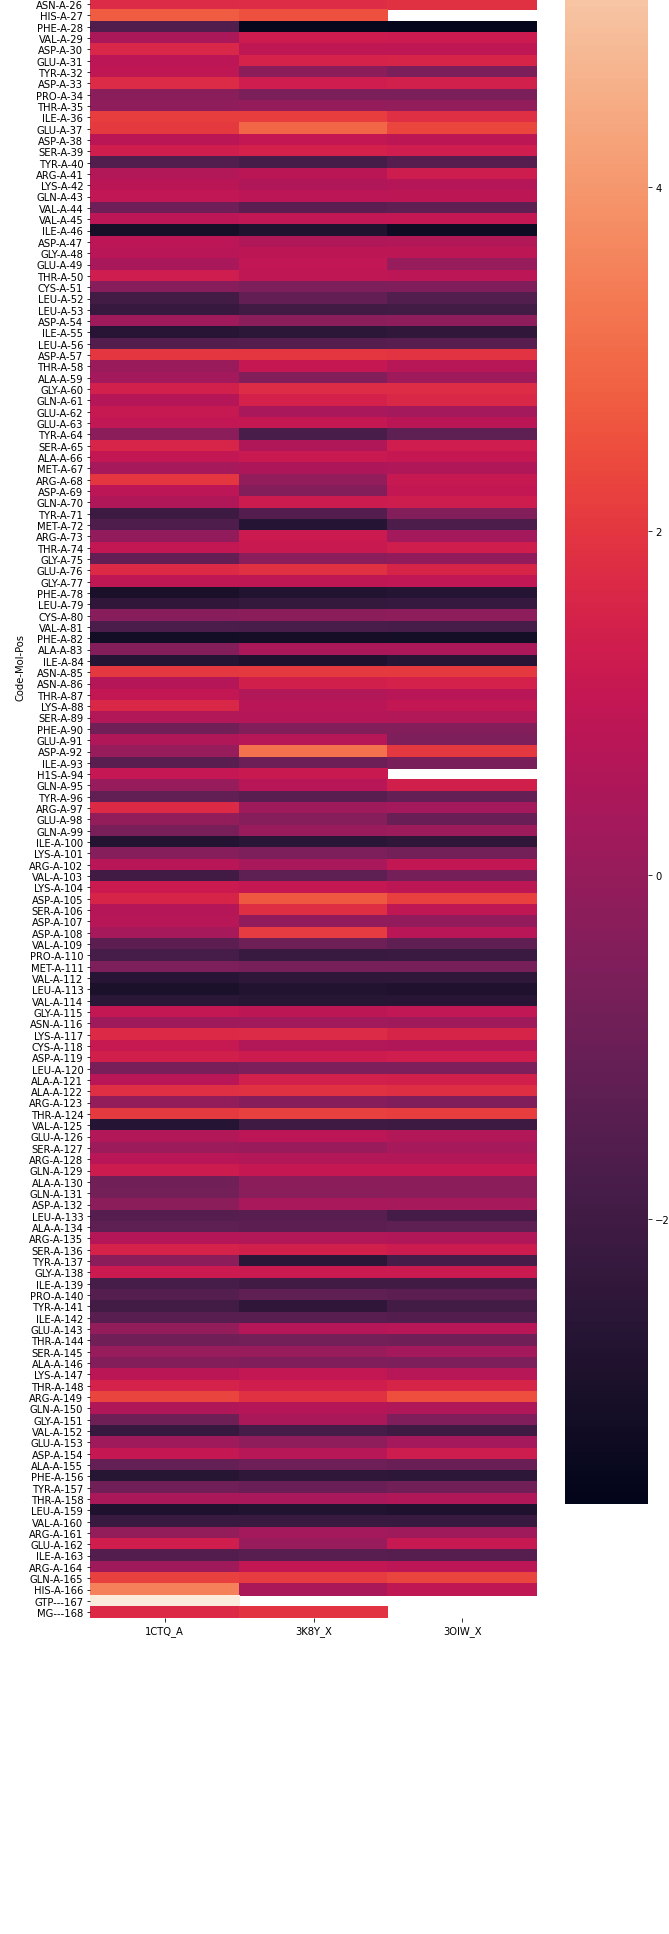

In [8]:
plt.figure(figsize=(10,35))
sns.heatmap(resDf.astype("double"))